<b>Target :</b> To reduce overfitting by including dropout = 0.1<br>

<b>Results :</b> The gap between train and test accuracies has reduced but the overall performance has fallen to 98%<br>
  1. Best Train Accuracy : 98.85
  2. Best Test Accuracy : 99.17

<b>Analysis :</b> To improve test accuracy, I have to improve the train accuracy by improving the learning capacity of the model. I am going to try
  1. Increasing the number of kernels if possible
  2. Add image augmentation
  3. Trying a step learning scheduler

# Import Libraries

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# The first line of code loads the autoreload extension
# The second line of code sets the autoreload mode to automatically reload all modules before each execution
# Without autoreload, you would need to restart the kernel and re-import the module to see the changes
# We no longer need to restart the kernel, but we have to re-import the module. Is this the expected behaviour?
%load_ext autoreload
%autoreload 2

In [4]:
!pip install torchsummary

In [5]:

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Dataloader Arguments & Test/Train Dataloaders


In [6]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
  torch.cuda.manual_seed(SEED)
  device = torch.device("cuda")
  batch_size = 128
  print("Running on the GPU")
else:
  device = torch.device("cpu")
  batch_size = 64
  print("Running on the CPU")


CUDA Available? False
Running on the CPU


In [7]:
from gdrive.MyDrive.utils_1 import *

train_loader, test_loader = getDataLoader(batch_size=batch_size)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 54969968.66it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1782980.48it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 11525179.47it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6909876.23it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# View sample images

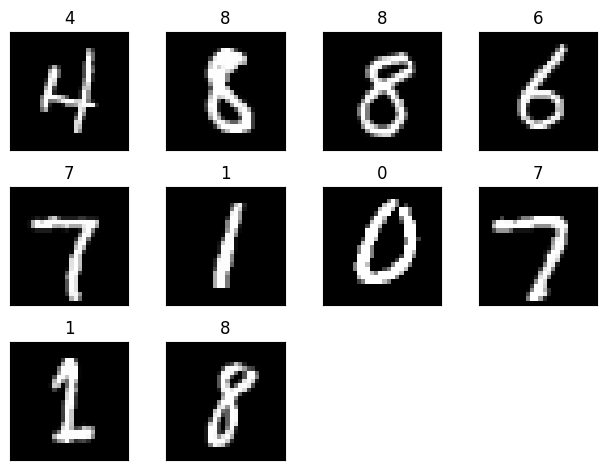

In [8]:
getSampleImages(train_loader, num_images = 10) # Need to fix this function as it can take a maximum of 12 images only

# Model Params

In [9]:
from gdrive.MyDrive.model_3 import Net # Instead of import * because Net is in a conflict with something else,

model = Net().to(device)
getModelSummary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

# Training and Testing

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

train_losses, test_losses, train_acc, test_acc = training(model, device, num_epochs, train_loader, test_loader, optimizer, criterion, scheduler=None)

Epoch 1


Train: Loss=0.0141 Batch_id=937 Accuracy=89.31: 100%|██████████| 938/938 [01:13<00:00, 12.68it/s]


Test set: Average loss: 0.0811, Accuracy: 9790/10000 (97.90%)

Epoch 2


Train: Loss=0.0505 Batch_id=937 Accuracy=97.35: 100%|██████████| 938/938 [01:15<00:00, 12.46it/s]


Test set: Average loss: 0.0750, Accuracy: 9779/10000 (97.79%)

Epoch 3


Train: Loss=0.2704 Batch_id=937 Accuracy=97.81: 100%|██████████| 938/938 [01:11<00:00, 13.10it/s]


Test set: Average loss: 0.0495, Accuracy: 9847/10000 (98.47%)

Epoch 4


Train: Loss=0.1310 Batch_id=937 Accuracy=98.10: 100%|██████████| 938/938 [01:19<00:00, 11.85it/s]


Test set: Average loss: 0.0376, Accuracy: 9885/10000 (98.85%)

Epoch 5


Train: Loss=0.0622 Batch_id=937 Accuracy=98.26: 100%|██████████| 938/938 [01:13<00:00, 12.70it/s]


Test set: Average loss: 0.0397, Accuracy: 9881/10000 (98.81%)

Epoch 6


Train: Loss=0.0510 Batch_id=937 Accuracy=98.44: 100%|██████████| 938/938 [01:20<00:00, 11.62it/s]


Test set: Average loss: 0.0357, Accuracy: 9886/10000 (98.86%)

Epoch 7


Train: Loss=0.0451 Batch_id=937 Accuracy=98.55: 100%|██████████| 938/938 [01:18<00:00, 11.96it/s]


Test set: Average loss: 0.0323, Accuracy: 9905/10000 (99.05%)

Epoch 8


Train: Loss=0.0710 Batch_id=937 Accuracy=98.57: 100%|██████████| 938/938 [01:16<00:00, 12.22it/s]


Test set: Average loss: 0.0376, Accuracy: 9891/10000 (98.91%)

Epoch 9


Train: Loss=0.0225 Batch_id=937 Accuracy=98.66: 100%|██████████| 938/938 [01:19<00:00, 11.86it/s]


Test set: Average loss: 0.0319, Accuracy: 9900/10000 (99.00%)

Epoch 10


Train: Loss=0.1090 Batch_id=937 Accuracy=98.67: 100%|██████████| 938/938 [01:16<00:00, 12.24it/s]


Test set: Average loss: 0.0349, Accuracy: 9888/10000 (98.88%)

Epoch 11


Train: Loss=0.1127 Batch_id=937 Accuracy=98.71: 100%|██████████| 938/938 [01:22<00:00, 11.37it/s]


Test set: Average loss: 0.0261, Accuracy: 9917/10000 (99.17%)

Epoch 12


Train: Loss=0.0286 Batch_id=937 Accuracy=98.78: 100%|██████████| 938/938 [01:17<00:00, 12.16it/s]


Test set: Average loss: 0.0302, Accuracy: 9909/10000 (99.09%)

Epoch 13


Train: Loss=0.0171 Batch_id=937 Accuracy=98.79: 100%|██████████| 938/938 [01:19<00:00, 11.85it/s]


Test set: Average loss: 0.0333, Accuracy: 9906/10000 (99.06%)

Epoch 14


Train: Loss=0.0087 Batch_id=937 Accuracy=98.80: 100%|██████████| 938/938 [01:16<00:00, 12.32it/s]


Test set: Average loss: 0.0337, Accuracy: 9894/10000 (98.94%)

Epoch 15


Train: Loss=0.0050 Batch_id=937 Accuracy=98.85: 100%|██████████| 938/938 [01:19<00:00, 11.84it/s]


Test set: Average loss: 0.0332, Accuracy: 9887/10000 (98.87%)



# Graphs

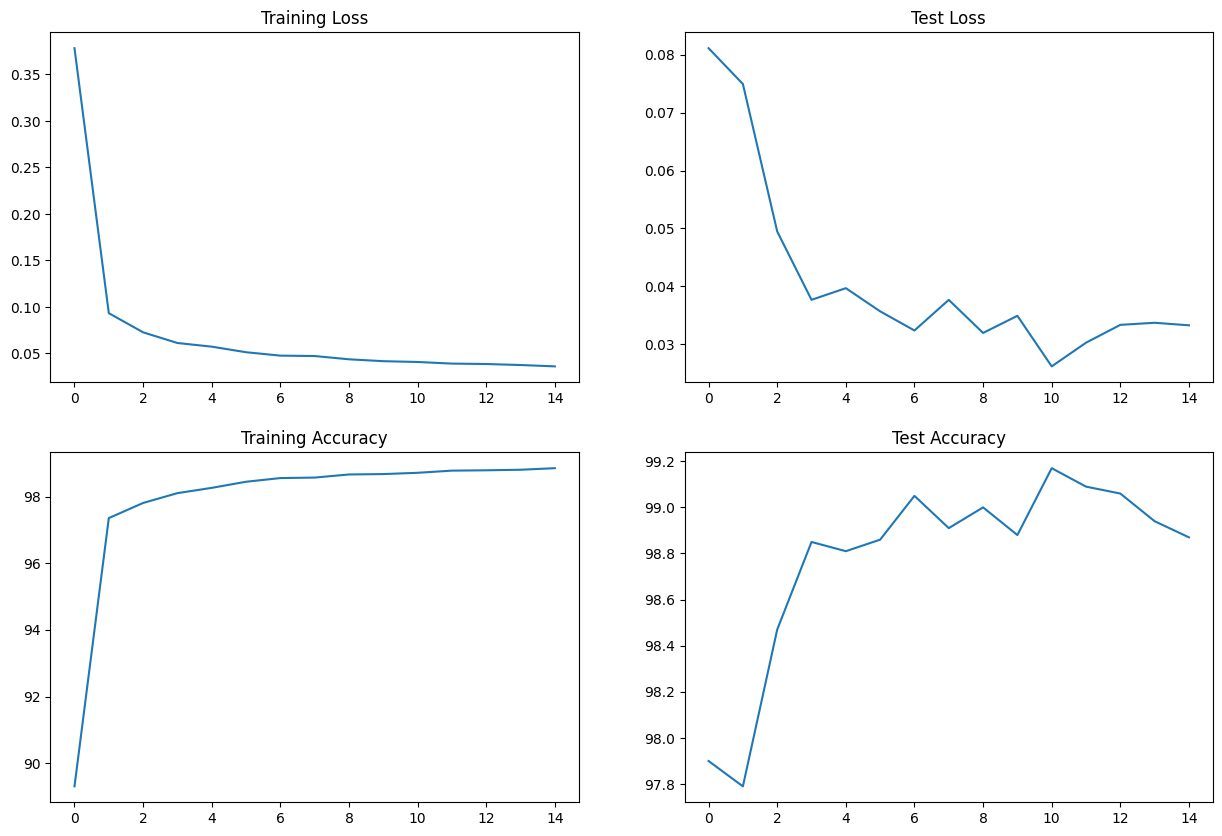

In [11]:
getTrainingTestPlots(train_losses, test_losses, train_acc, test_acc)